# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objs as go

sns.set_theme()

## Help Functions

In [30]:
def gravidade_caso(row):
    gravidade = ''
    if row['Febre'] == 1 or row['Dor de Garganta'] == 1 or row['Dor de Cabeca'] == 1 or row['Nariz Entupido ou Escorrendo'] == 1 or row['Tosse'] == 1 or row['Perda de Cheiro ou Sabor'] == 1:
        gravidade = 'Leve'
        
    if row['Dificuldade para Respirar'] == 1 or row['Dor no Peito'] == 1:
        gravidade = 'Grave'

    if gravidade == '':
        gravidade = 'Baixa\Assintomático'
    return gravidade

In [3]:
def join_result_covid(row):
    result_1 = row['Resultado Teste Covid Boca Nariza']
    result_2 = row['Resultado Teste Covid Dedo']
    result_3 = row['Resultado Teste Covid Braco']
    result_final = ''
    if not pd.isna(result_1):
        result_final = result_1
    elif not pd.isna(result_2):
        result_final = result_2
    elif not pd.isna(result_1):
        result_final = result_3

    return result_final

## Loading Data

In [4]:
df1 = pd.read_csv(r"C:\Users\brcalazans\Desktop\Pessoal\FIAP\Aulas\Fase 3\Tech Challenge\dados\PNAD_COVID_092020.csv")

In [5]:
df2 = pd.read_csv(r"C:\Users\brcalazans\Desktop\Pessoal\FIAP\Aulas\Fase 3\Tech Challenge\dados\PNAD_COVID_102020.csv")

In [6]:
df3 = pd.read_csv(r"C:\Users\brcalazans\Desktop\Pessoal\FIAP\Aulas\Fase 3\Tech Challenge\dados\PNAD_COVID_112020.csv")

In [7]:
df = pd.concat([df1, df2, df3], ignore_index=True)

# Descrição dos Dados

In [8]:
df1 = df.copy()

## Seleção das Colunas

In [9]:
df1 = df1[['UF', 'A002', 'A003', 'A004', 'B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 
    'B0018','B0019','B00111','B00112', 'B008', 'B009B', 'B009D', 'B009F', 'B011', 'B002', 'D0051', 'C011A11']]

## Renomeio das Colunas

In [10]:
column_names = ['UF', 'Idade', 'Sexo', 'Cor ou Raca', 'Febre', 'Tosse', 'Dor de Garganta', 'Dificuldade para Respirar',
                'Dor de Cabeca', 'Dor no Peito', 'Nausea', 'Nariz Entupido ou Escorrendo', 'Fadiga', 'Perda de Cheiro ou Sabor',
                'Dor Muscular', 'Realizou Teste Covid', 'Resultado Teste Covid Boca Nariza', 'Resultado Teste Covid Dedo',
                'Resultado Teste Covid Braco', 'Medida de Restricao de Contato', 'Foi ao Estabelecimento de Saude',
                'Auxilio Emergencial', 'Faixa de Rendimento']

df1.columns = column_names

## Dimensão dos Dados

In [11]:
print( 'Number of Rows: {}'.format( df1.shape[0]))
print( 'Number of Cols: {}'.format( df1.shape[1]))

Number of Rows: 1149197
Number of Cols: 23


## Tipos dos Dados

In [12]:
df1.dtypes

UF                                     int64
Idade                                  int64
Sexo                                   int64
Cor ou Raca                            int64
Febre                                  int64
Tosse                                  int64
Dor de Garganta                        int64
Dificuldade para Respirar              int64
Dor de Cabeca                          int64
Dor no Peito                           int64
Nausea                                 int64
Nariz Entupido ou Escorrendo           int64
Fadiga                                 int64
Perda de Cheiro ou Sabor               int64
Dor Muscular                           int64
Realizou Teste Covid                   int64
Resultado Teste Covid Boca Nariza    float64
Resultado Teste Covid Dedo           float64
Resultado Teste Covid Braco          float64
Medida de Restricao de Contato         int64
Foi ao Estabelecimento de Saude      float64
Auxilio Emergencial                    int64
Faixa de R

## Verificação de Valores Nulos

In [13]:
df1.isna().sum()

UF                                         0
Idade                                      0
Sexo                                       0
Cor ou Raca                                0
Febre                                      0
Tosse                                      0
Dor de Garganta                            0
Dificuldade para Respirar                  0
Dor de Cabeca                              0
Dor no Peito                               0
Nausea                                     0
Nariz Entupido ou Escorrendo               0
Fadiga                                     0
Perda de Cheiro ou Sabor                   0
Dor Muscular                               0
Realizou Teste Covid                       0
Resultado Teste Covid Boca Nariza    1098266
Resultado Teste Covid Dedo           1086297
Resultado Teste Covid Braco          1110474
Medida de Restricao de Contato             0
Foi ao Estabelecimento de Saude      1104247
Auxilio Emergencial                        0
Faixa de R

In [14]:
df1.columns

Index(['UF', 'Idade', 'Sexo', 'Cor ou Raca', 'Febre', 'Tosse',
       'Dor de Garganta', 'Dificuldade para Respirar', 'Dor de Cabeca',
       'Dor no Peito', 'Nausea', 'Nariz Entupido ou Escorrendo', 'Fadiga',
       'Perda de Cheiro ou Sabor', 'Dor Muscular', 'Realizou Teste Covid',
       'Resultado Teste Covid Boca Nariza', 'Resultado Teste Covid Dedo',
       'Resultado Teste Covid Braco', 'Medida de Restricao de Contato',
       'Foi ao Estabelecimento de Saude', 'Auxilio Emergencial',
       'Faixa de Rendimento'],
      dtype='object')

## Tratamento de Dados

### Juntando Resultados de Covid

In [15]:
df1['Resultado Covid'] = df1.apply(lambda row: join_result_covid(row), axis=1)

In [ ]:
df1['Resultado Covid'].unique()

# Visualização de Dados

In [ ]:
df1.loc[df1['Resultado Covid'].isna()][['Resultado Teste Covid Boca Nariza', 'Resultado Teste Covid Dedo', 'Resultado Teste Covid Braco']].sum()

## Distribuição de Pesquisas por Estado

In [ ]:
import json
import plotly.express as px

geojson = json.load(open(r'C:\Users\brcalazans\Desktop\Pessoal\FIAP\Aulas\Fase 3\Tech Challenge\scripts\brasil_estados.json'))

In [ ]:
uf = {
"11":"Rondônia",
"12":"Acre",
"13":"Amazonas",
"14":"Roraima",
"15":"Pará",
"16":"Amapá",
"17":"Tocantins",
"21":"Maranhão",
"22":"Piauí",
"23":"Ceará",
"24":"Rio Grande do Norte",
"25":"Paraíba",
"26":"Pernambuco",
"27":"Alagoas",
"28":"Sergipe",
"29":"Bahia",
"31":"Minas Gerais",
"32":"Espírito Santo",
"33":"Rio de Janeiro",
"35":"São Paulo",
"41":"Paraná",
"42":"Santa Catarina",
"43":"Rio Grande do Sul",
"50":"Mato Grosso do Sul",
"51":"Mato Grosso",
"52":"Goiás",
"53":"Distrito Federal"
}

In [ ]:
df1['UF'] = df1['UF'].astype(str)
df1['Estado'] = df1['UF'].map(uf)

In [ ]:
estados_sigla = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

In [ ]:
df1['Estado_Sigla'] = df1['Estado'].map(estados_sigla)

In [ ]:
uf_agrupada = df1[['Estado_Sigla', 'Resultado Covid']].groupby('Estado_Sigla').count().reset_index()

In [ ]:
fig_choropleth = px.choropleth(uf_agrupada, geojson=geojson, locations='Estado_Sigla', color='Resultado Covid',
                           color_continuous_scale="Reds",
                            scope='south america'
                          )

fig_choropleth.show()

## Distribuição de Casos Positivos de Covid Por Estado

In [ ]:
#df1 = df1.loc[df1['Resultado Covid'] != '']

In [23]:
#df1 = df1.loc[df1['Resultado Covid'].isin([1, 2])]
df1 = df1.loc[df1['Resultado Covid'] == 1]

In [ ]:
df1.shape

In [ ]:
uf_agrupada = df1[['Estado_Sigla', 'Resultado Covid']].groupby('Estado_Sigla').count().reset_index()

In [ ]:
fig_choropleth = px.choropleth(uf_agrupada, geojson=geojson, locations='Estado_Sigla', color='Resultado Covid',
                           color_continuous_scale="Reds",
                            scope='south america'
                          )

fig_choropleth.show()

## Distribuição e Classificação da Gravidade dos Casos

In [24]:
classificador = {
    'Febre': 'Leve',
    'Dor de Garganta': 'Leve',
    'Dor de Cabeca': 'Leve',
    'Nariz Entupido ou Escorrendo': 'Leve',
    'Tosse': 'Leve',
    'Perda de Cheiro ou Sabor': 'Leve',
    'Dificuldade para Respirar': 'Grave',
    'Dor no Peito': 'Grave'
}

df_classificador = pd.DataFrame(classificador.items(), columns=['Sintoma', 'Classificação'])

In [31]:
df1['Gravidade'] = df1.apply(lambda row: gravidade_caso(row), axis=1)

In [32]:
df_gravidade = df1[['Resultado Covid', 'Gravidade']].groupby('Gravidade').count().reset_index()

In [33]:
df_gravidade = df_gravidade.sort_values(by='Resultado Covid', ascending=False)

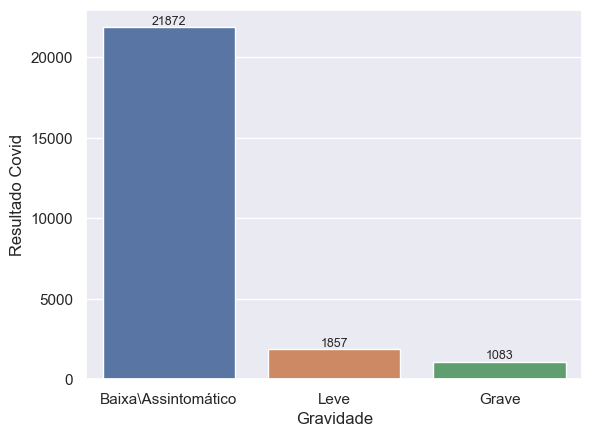

In [34]:
ax = sns.barplot(df_gravidade, x="Gravidade", y="Resultado Covid", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=9);

In [29]:
df_classificador

,Sintoma,Classificação
0,Febre,Leve
1,Dor de Garganta,Leve
2,Dor de Cabeca,Leve
3,Nariz Entupido ou Escorrendo,Leve
4,Tosse,Leve
5,Perda de Cheiro ou Sabor,Leve
6,Dificuldade para Respirar,Grave
7,Dor no Peito,Grave


## Identificação dos Assintomaticos e Isolamento

In [41]:
df1.head()

,UF,Idade,Sexo,Cor ou Raca,Febre,Tosse,Dor de Garganta,Dificuldade para Respirar,Dor de Cabeca,Dor no Peito,...,Realizou Teste Covid,Resultado Teste Covid Boca Nariza,Resultado Teste Covid Dedo,Resultado Teste Covid Braco,Medida de Restricao de Contato,Foi ao Estabelecimento de Saude,Auxilio Emergencial,Faixa de Rendimento,Resultado Covid,Gravidade
23,11,36,2,4,2,2,2,2,2,2,...,1,1.0,2.0,1.0,2,NaN,2,NaN,1.0,Baixa\Assintomático
30,11,50,2,4,2,2,2,2,2,2,...,1,NaN,1.0,1.0,3,NaN,2,4.0,1.0,Baixa\Assintomático
31,11,45,1,4,2,2,2,2,2,2,...,1,NaN,1.0,1.0,2,NaN,2,5.0,1.0,Baixa\Assintomático
52,11,28,1,4,2,2,2,2,2,2,...,1,1.0,NaN,2.0,2,NaN,2,5.0,1.0,Baixa\Assintomático
55,11,38,2,4,2,2,2,2,2,2,...,1,1.0,1.0,1.0,2,NaN,2,4.0,1.0,Baixa\Assintomático


In [44]:
df_isolamento = df1.loc[(df1['Gravidade'] == 'Baixa\Assintomático')]

In [55]:
df_isolamento['Medida de Restricao de Contato'] = df_isolamento['Medida de Restricao de Contato'].replace(1, 'Não Fez Restrição').replace(2, 'Reduziu Contato e Continou Trabalhando').replace(3, 'Ficou em Casa e Saiu Pouco').replace(4, 'Ficou rigorosamente em Casa').replace(9, 'Ignorado')

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_251300\522389735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isolamento['Medida de Restricao de Contato'] = df_isolamento['Medida de Restricao de Contato'].replace(1, 'Não Fez Restrição').replace(2, 'Reduziu Contato e Continou Trabalhando').replace(3, 'Ficou em Casa e Saiu Pouco').replace(4, 'Ficou rigorosamente em Casa').replace(9, 'Ignorado')


In [56]:
df_isolamento[['Resultado Covid', 'Medida de Restricao de Contato']].groupby('Medida de Restricao de Contato').count().reset_index()

,Medida de Restricao de Contato,Resultado Covid
0,Ficou em Casa e Saiu Pouco,6587
1,Ficou rigorosamente em Casa,1740
2,Ignorado,43
3,Não Fez Restrição,1516
4,"Reduziu Contato, mas Continou Trabalhando",11986


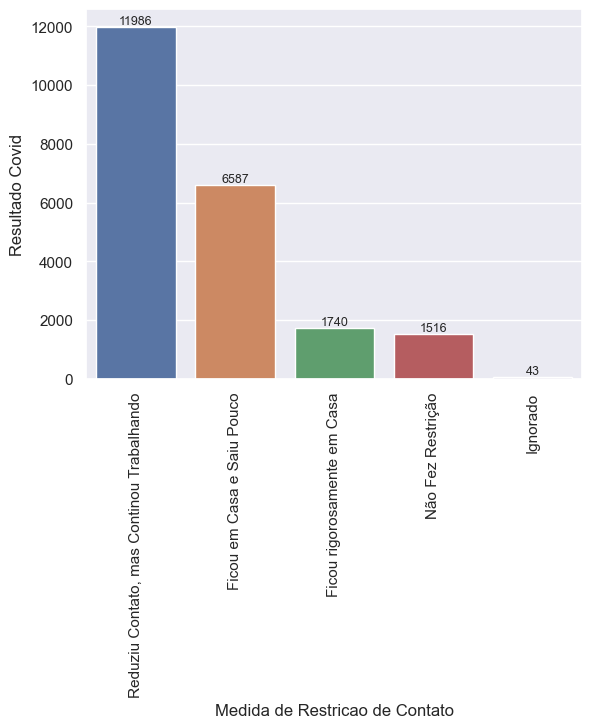

In [57]:
ax = sns.barplot(df_isolamento, x="Medida de Restricao de Contato", y="Resultado Covid", estimator="sum", errorbar=None)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fontsize=9);